In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
dataset=pd.read_csv("/kaggle/input/the-boston-houseprice-data/boston.csv")
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [23]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [24]:
correlation=dataset.corr()

Text(0.5, 1.0, 'Correlation Graph')

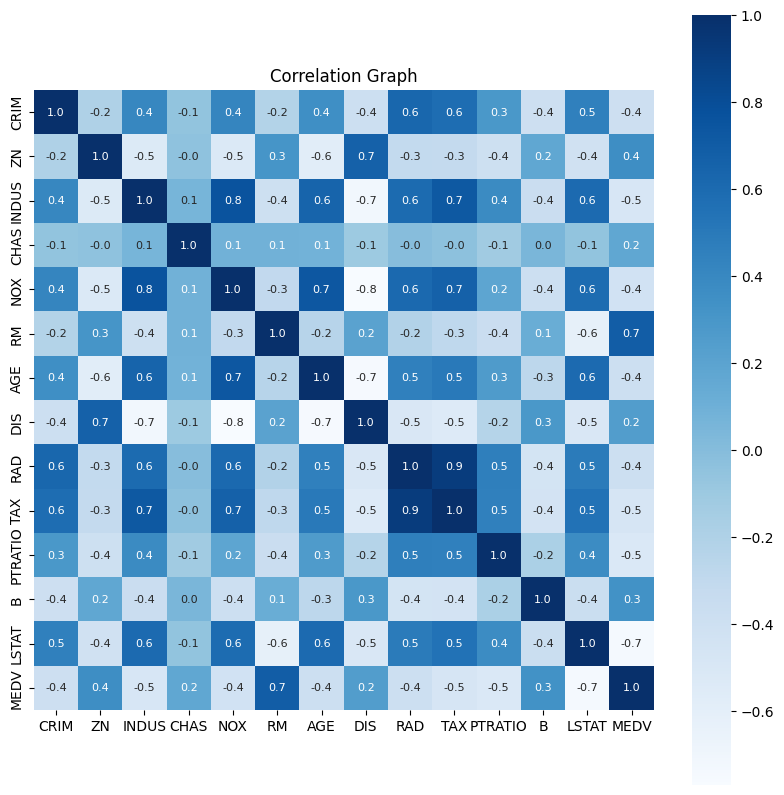

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.title('Correlation Graph')

In [26]:
x = dataset.drop('MEDV', axis=1)
y = dataset['MEDV']


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [30]:
model1.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred=model1.predict(x_train)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
print(f"LR MSE: {mse}")
print(f"LR R² Score: {r2}")
print(f"LR MAE: {mae}")


LR MSE: 21.641412753226312
LR R² Score: 0.7508856358979673
LR MAE: 3.3147716267832266


In [33]:
from xgboost import XGBRegressor

model2 = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
model2.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [34]:
y_pred = model2.predict(x_train)


In [35]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

print(f"XGBoost MSE: {mse}")
print(f"XGBoost R² Score: {r2}")
print(f"XGBoost MAE: {mae}")


XGBoost MSE: 0.08386040324833598
XGBoost R² Score: 0.9990346826583475
XGBoost MAE: 0.21222706313180448


In [36]:
input=np.array([[0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94]])

In [37]:
model1.predict(input)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29.13333934])

In [38]:
model2.predict(input)

array([33.66932], dtype=float32)